# 06 - Measures of Dispersion

**Dispersion:** How spread out the data is. Two datasets can have the same average but very different spreads.

Key measures:
- **Range:** Biggest minus smallest
- **IQR (Interquartile Range):** Spread of middle 50%
- **Standard Deviation (SD):** Average distance from the mean
- **Coefficient of Variation (CV):** Spread as a percentage of mean (for comparing different scales)
- **MAD (Median Absolute Deviation):** Spread around median, ignores outliers

**Key Idea:** The mean tells you the center, but dispersion tells you how reliable that center is.

## Simple Example: Two Sales Reps with Same Average

Both average $100/day, but one is consistent, the other is unpredictable.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_60385/760077890.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(box_data, labels=['Rep A\n(Consistent)', 'Rep B\n(Unpredictable)'],


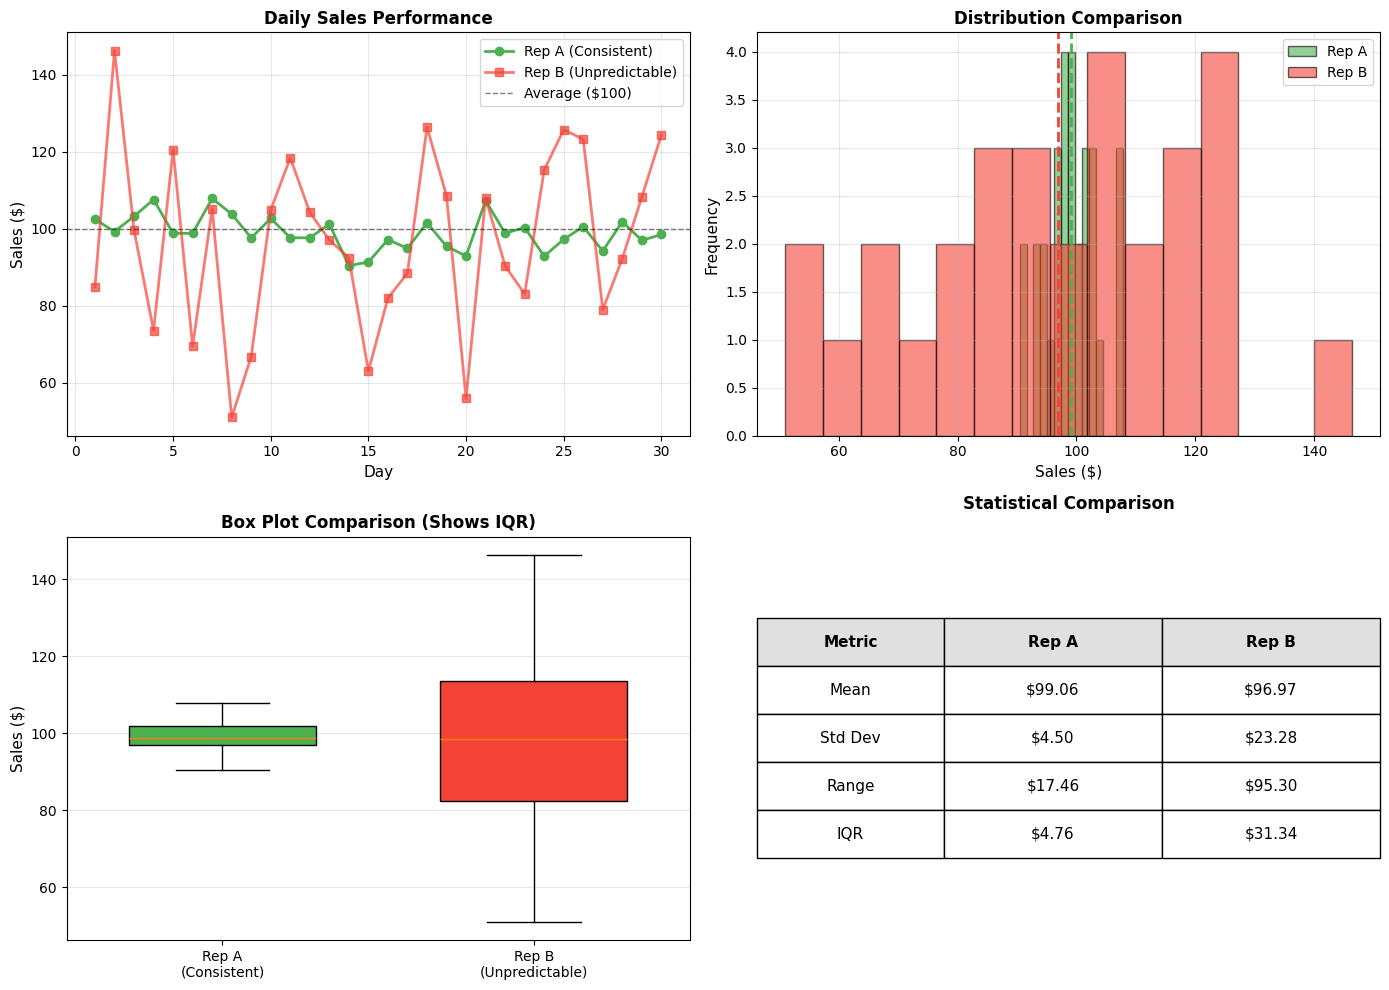


📊 Key Insight:
   Both reps average ~$99/day
   But Rep A is MUCH more reliable (SD: $4.50 vs $23.28)

→ Same average, very different risk profiles!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Rep A: Consistent performance
rep_a = np.random.normal(100, 5, 30)  # Mean 100, low spread (SD=5)

# Rep B: Unpredictable performance
rep_b = np.random.normal(100, 25, 30)  # Mean 100, high spread (SD=25)

# Calculate measures
metrics = {
    'Rep A': {
        'mean': np.mean(rep_a),
        'std': np.std(rep_a, ddof=1),
        'range': np.max(rep_a) - np.min(rep_a),
        'iqr': np.percentile(rep_a, 75) - np.percentile(rep_a, 25)
    },
    'Rep B': {
        'mean': np.mean(rep_b),
        'std': np.std(rep_b, ddof=1),
        'range': np.max(rep_b) - np.min(rep_b),
        'iqr': np.percentile(rep_b, 75) - np.percentile(rep_b, 25)
    }
}

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time series
days = np.arange(1, 31)
axes[0, 0].plot(days, rep_a, marker='o', label='Rep A (Consistent)', color='#4CAF50', linewidth=2)
axes[0, 0].plot(days, rep_b, marker='s', label='Rep B (Unpredictable)', color='#F44336', linewidth=2, alpha=0.7)
axes[0, 0].axhline(100, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Average ($100)')
axes[0, 0].set_xlabel('Day', fontsize=11)
axes[0, 0].set_ylabel('Sales ($)', fontsize=11)
axes[0, 0].set_title('Daily Sales Performance', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histograms
axes[0, 1].hist(rep_a, bins=15, alpha=0.6, label='Rep A', color='#4CAF50', edgecolor='black')
axes[0, 1].hist(rep_b, bins=15, alpha=0.6, label='Rep B', color='#F44336', edgecolor='black')
axes[0, 1].axvline(np.mean(rep_a), color='#4CAF50', linestyle='--', linewidth=2)
axes[0, 1].axvline(np.mean(rep_b), color='#F44336', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Sales ($)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution Comparison', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plots
box_data = [rep_a, rep_b]
bp = axes[1, 0].boxplot(box_data, labels=['Rep A\n(Consistent)', 'Rep B\n(Unpredictable)'],
                        patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor('#4CAF50')
bp['boxes'][1].set_facecolor('#F44336')
axes[1, 0].set_ylabel('Sales ($)', fontsize=11)
axes[1, 0].set_title('Box Plot Comparison (Shows IQR)', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Comparison table
axes[1, 1].axis('off')
table_data = [
    ['Metric', 'Rep A', 'Rep B'],
    ['Mean', f"${metrics['Rep A']['mean']:.2f}", f"${metrics['Rep B']['mean']:.2f}"],
    ['Std Dev', f"${metrics['Rep A']['std']:.2f}", f"${metrics['Rep B']['std']:.2f}"],
    ['Range', f"${metrics['Rep A']['range']:.2f}", f"${metrics['Rep B']['range']:.2f}"],
    ['IQR', f"${metrics['Rep A']['iqr']:.2f}", f"${metrics['Rep B']['iqr']:.2f}"]
]

table = axes[1, 1].table(cellText=table_data, cellLoc='center', loc='center',
                        colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#E0E0E0')
    table[(0, i)].set_text_props(weight='bold')

axes[1, 1].set_title('Statistical Comparison', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Key Insight:")
print(f"   Both reps average ~${metrics['Rep A']['mean']:.0f}/day")
print(f"   But Rep A is MUCH more reliable (SD: ${metrics['Rep A']['std']:.2f} vs ${metrics['Rep B']['std']:.2f})")
print(f"\n→ Same average, very different risk profiles!")

## Real-World Example: Comparing Product Sales Variability

Two products with different sales patterns. Coefficient of Variation (CV) helps compare across different scales.

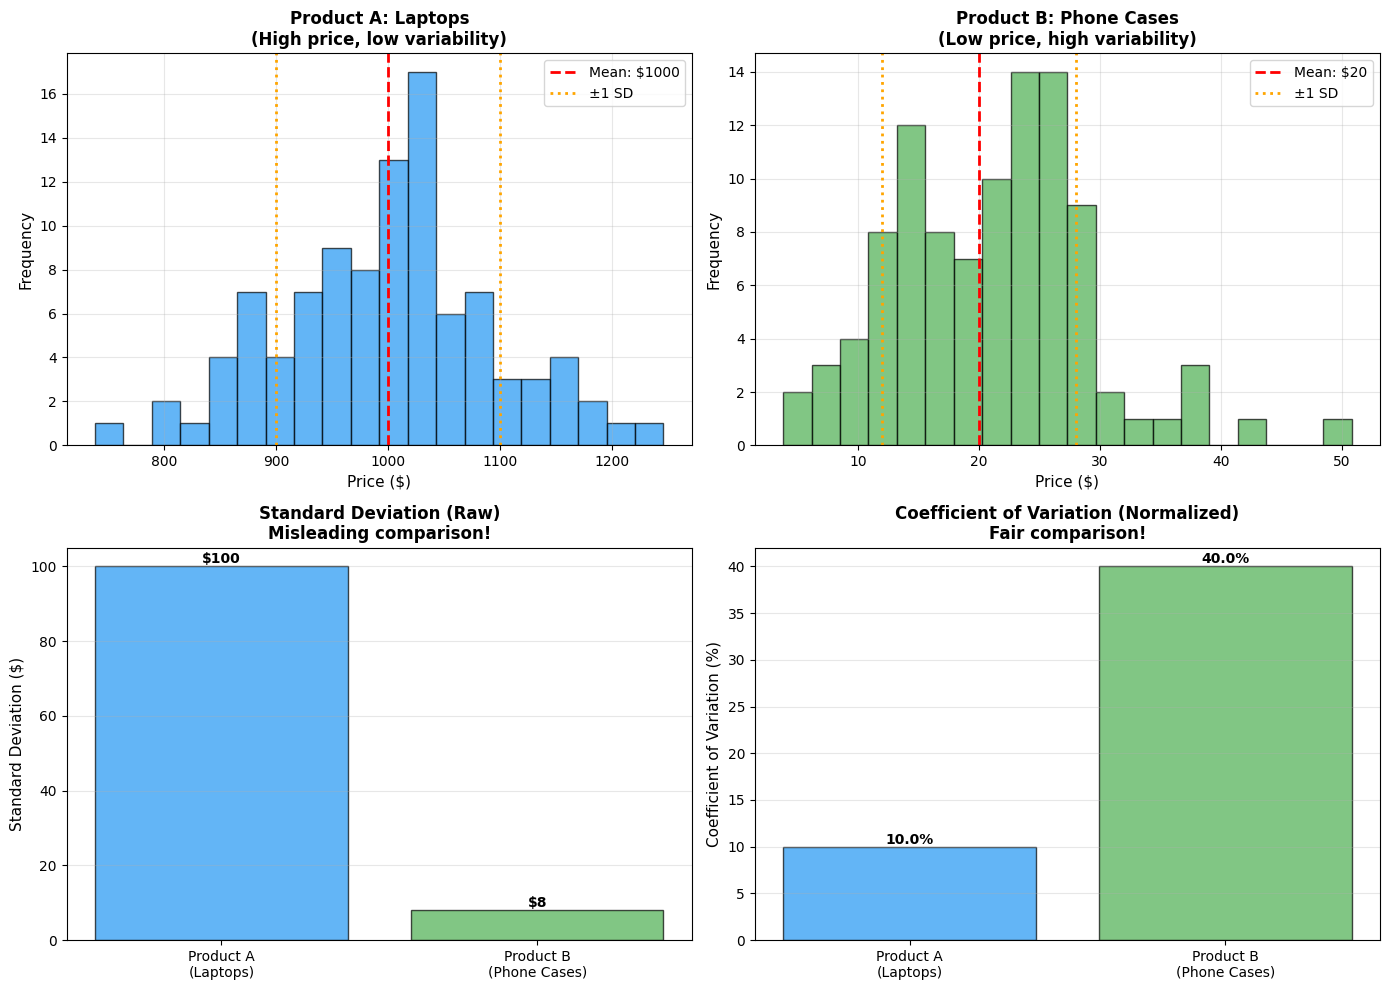


📊 Statistical Summary:

Product A (Laptops):
   Mean: $1000 | SD: $100 | CV: 10.0% | MAD: $58.74

Product B (Phone Cases):
   Mean: $20 | SD: $8 | CV: 40.0% | MAD: $5.35

💡 Key Insights:
   → Raw SD is misleading: $100 vs $8 (laptops look more variable)
   → CV reveals truth: 10% vs 40% (phone cases are MORE variable relative to price)
   → Phone cases have 4.0x more relative variability!

🎯 Business Application:
   → Product A (CV=10%): Predictable, easier inventory management
   → Product B (CV=40%): Unpredictable, needs safety stock or dynamic pricing


In [2]:
# Product A: High-priced item (laptops) - mean=$1000, SD=$100
product_a_mean = 1000
product_a_sd = 100
product_a = np.random.normal(product_a_mean, product_a_sd, 100)

# Product B: Low-priced item (phone cases) - mean=$20, SD=$8
product_b_mean = 20
product_b_sd = 8
product_b = np.random.normal(product_b_mean, product_b_sd, 100)

# Calculate CV (Coefficient of Variation)
cv_a = (product_a_sd / product_a_mean) * 100  # 10%
cv_b = (product_b_sd / product_b_mean) * 100  # 40%

# Calculate MAD (Median Absolute Deviation)
mad_a = np.median(np.abs(product_a - np.median(product_a)))
mad_b = np.median(np.abs(product_b - np.median(product_b)))

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms
axes[0, 0].hist(product_a, bins=20, color='#2196F3', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(product_a_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${product_a_mean}')
axes[0, 0].axvline(product_a_mean - product_a_sd, color='orange', linestyle=':', linewidth=2, label=f'±1 SD')
axes[0, 0].axvline(product_a_mean + product_a_sd, color='orange', linestyle=':', linewidth=2)
axes[0, 0].set_xlabel('Price ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Product A: Laptops\n(High price, low variability)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(product_b, bins=20, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(product_b_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${product_b_mean}')
axes[0, 1].axvline(product_b_mean - product_b_sd, color='orange', linestyle=':', linewidth=2, label=f'±1 SD')
axes[0, 1].axvline(product_b_mean + product_b_sd, color='orange', linestyle=':', linewidth=2)
axes[0, 1].set_xlabel('Price ($)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Product B: Phone Cases\n(Low price, high variability)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Standard Deviation comparison (raw)
axes[1, 0].bar(['Product A\n(Laptops)', 'Product B\n(Phone Cases)'], 
               [product_a_sd, product_b_sd],
               color=['#2196F3', '#4CAF50'], alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Standard Deviation ($)', fontsize=11)
axes[1, 0].set_title('Standard Deviation (Raw)\nMisleading comparison!', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (val, label) in enumerate(zip([product_a_sd, product_b_sd], ['$100', '$8'])):
    axes[1, 0].text(i, val, label, ha='center', va='bottom', fontweight='bold')

# Coefficient of Variation comparison (normalized)
axes[1, 1].bar(['Product A\n(Laptops)', 'Product B\n(Phone Cases)'], 
               [cv_a, cv_b],
               color=['#2196F3', '#4CAF50'], alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Coefficient of Variation (%)', fontsize=11)
axes[1, 1].set_title('Coefficient of Variation (Normalized)\nFair comparison!', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, val in enumerate([cv_a, cv_b]):
    axes[1, 1].text(i, val, f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Statistical Summary:")
print("\nProduct A (Laptops):")
print(f"   Mean: ${product_a_mean} | SD: ${product_a_sd} | CV: {cv_a:.1f}% | MAD: ${mad_a:.2f}")
print("\nProduct B (Phone Cases):")
print(f"   Mean: ${product_b_mean} | SD: ${product_b_sd} | CV: {cv_b:.1f}% | MAD: ${mad_b:.2f}")

print("\n💡 Key Insights:")
print(f"   → Raw SD is misleading: ${product_a_sd} vs ${product_b_sd} (laptops look more variable)")
print(f"   → CV reveals truth: {cv_a:.0f}% vs {cv_b:.0f}% (phone cases are MORE variable relative to price)")
print(f"   → Phone cases have {cv_b/cv_a:.1f}x more relative variability!")

print("\n🎯 Business Application:")
print("   → Product A (CV=10%): Predictable, easier inventory management")
print("   → Product B (CV=40%): Unpredictable, needs safety stock or dynamic pricing")

## Demonstrating MAD vs Standard Deviation with Outliers

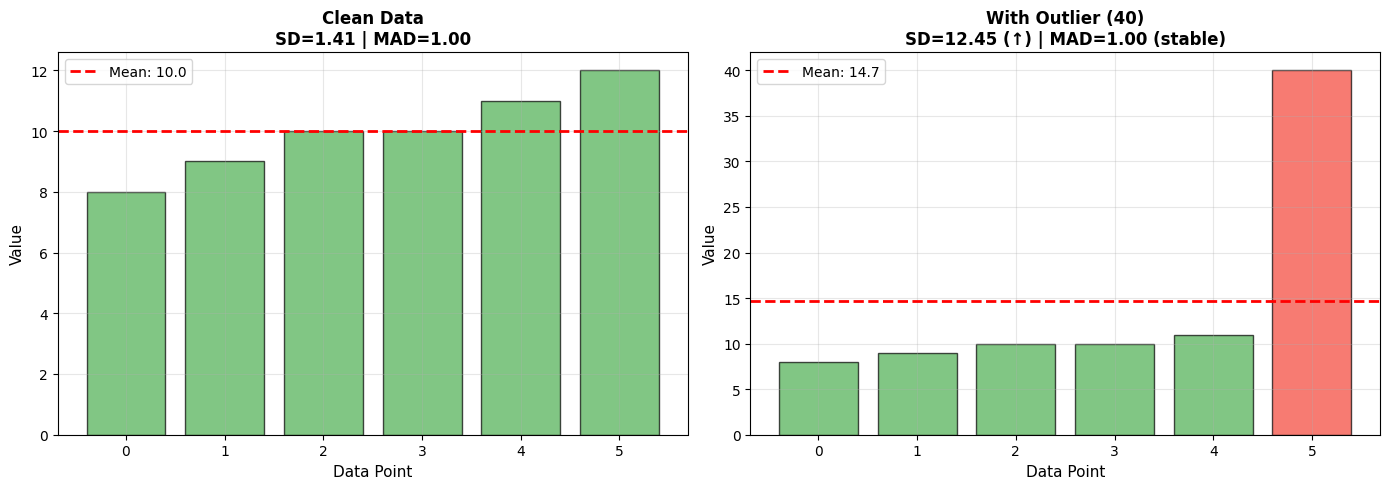


📊 Impact of Outlier:
   Mean: 10.0 → 14.7 (jumps 4.7)
   SD: 1.41 → 12.45 (balloons 8.8x)
   MAD: 1.00 → 1.00 (stays calm!)

💡 When to use MAD:
   → When data has outliers that aren't errors
   → When you want robust measure of typical spread
   → Financial data, sensor data with occasional spikes


In [3]:
# Dataset without outlier
data_clean = np.array([8, 9, 10, 10, 11, 12])

# Dataset with outlier
data_outlier = np.array([8, 9, 10, 10, 11, 40])  # 40 is outlier

# Calculate measures
mean_clean = np.mean(data_clean)
sd_clean = np.std(data_clean, ddof=1)
mad_clean = np.median(np.abs(data_clean - np.median(data_clean)))

mean_outlier = np.mean(data_outlier)
sd_outlier = np.std(data_outlier, ddof=1)
mad_outlier = np.median(np.abs(data_outlier - np.median(data_outlier)))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clean data
axes[0].bar(range(len(data_clean)), data_clean, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0].axhline(mean_clean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_clean:.1f}')
axes[0].set_title(f'Clean Data\nSD={sd_clean:.2f} | MAD={mad_clean:.2f}', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Data Point', fontsize=11)
axes[0].set_ylabel('Value', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Data with outlier
colors = ['#4CAF50']*5 + ['#F44336']  # Red for outlier
axes[1].bar(range(len(data_outlier)), data_outlier, color=colors, alpha=0.7, edgecolor='black')
axes[1].axhline(mean_outlier, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_outlier:.1f}')
axes[1].set_title(f'With Outlier (40)\nSD={sd_outlier:.2f} (↑) | MAD={mad_outlier:.2f} (stable)', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Data Point', fontsize=11)
axes[1].set_ylabel('Value', fontsize=11)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Impact of Outlier:")
print(f"   Mean: {mean_clean:.1f} → {mean_outlier:.1f} (jumps {mean_outlier-mean_clean:.1f})")
print(f"   SD: {sd_clean:.2f} → {sd_outlier:.2f} (balloons {sd_outlier/sd_clean:.1f}x)")
print(f"   MAD: {mad_clean:.2f} → {mad_outlier:.2f} (stays calm!)")

print("\n💡 When to use MAD:")
print("   → When data has outliers that aren't errors")
print("   → When you want robust measure of typical spread")
print("   → Financial data, sensor data with occasional spikes")

## Summary: Choosing Dispersion Measures

| Measure | Best For | Weakness |
|---------|----------|----------|
| **Range** | Quick sense of spread | Sensitive to outliers |
| **IQR** | Robust middle spread | Ignores tails |
| **Standard Deviation** | Most common, works with normal data | Very sensitive to outliers |
| **Coefficient of Variation** | Comparing different scales | Only for positive data |
| **MAD** | Robust to outliers | Less common, harder to interpret |

### Key Takeaways
1. **Two datasets with same mean can have very different reliability**
2. **Use CV to compare variability across different scales** (laptops vs phone cases)
3. **Use MAD when outliers are legitimate but shouldn't dominate** (sensor data)
4. **Always report both center AND spread** for complete picture